In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = "spotify-2023.csv"
df = pd.read_csv(file, encoding="latin1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


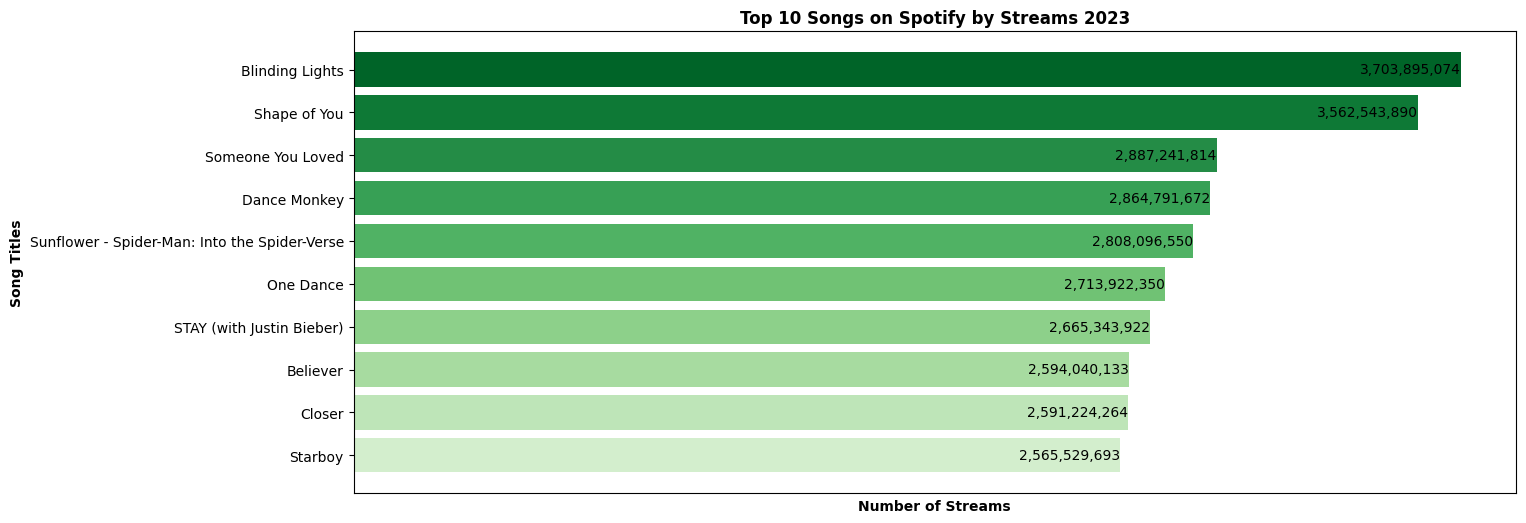

In [2]:
#1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, 
#   на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df = df.sort_values(by="streams", ascending=False)
df.dropna(subset=["streams"], inplace=True)

top_10 = df.head(10)
streams = top_10["streams"][::-1]
names = top_10["track_name"][::-1]

colors = plt.get_cmap("Greens")(np.linspace(0.2, 0.9, len(streams)))
plt.figure(figsize=(15, 6))
plt.barh(names, streams, color=colors)
for i, v in enumerate(streams):
    plt.text(v, i, f"{round(v):,}", ha='right', va='center')
plt.title("Top 10 Songs on Spotify by Streams 2023", fontweight="bold")
plt.xlabel("Number of Streams", fontweight="bold")
plt.ylabel("Song Titles", fontweight="bold")
plt.xticks([])
plt.show()

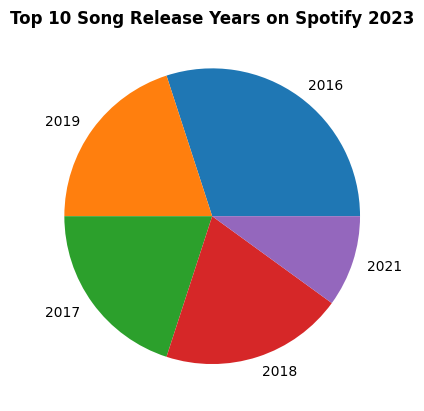

In [3]:
#2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, 
#   яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.

# немає в датасеті колонки відповідальної за жанр, роблю по року випуску пісні
years = top_10["released_year"].value_counts()

plt.pie(years, labels = years.index)
plt.title("Top 10 Song Release Years on Spotify 2023", fontweight="bold")
plt.show()

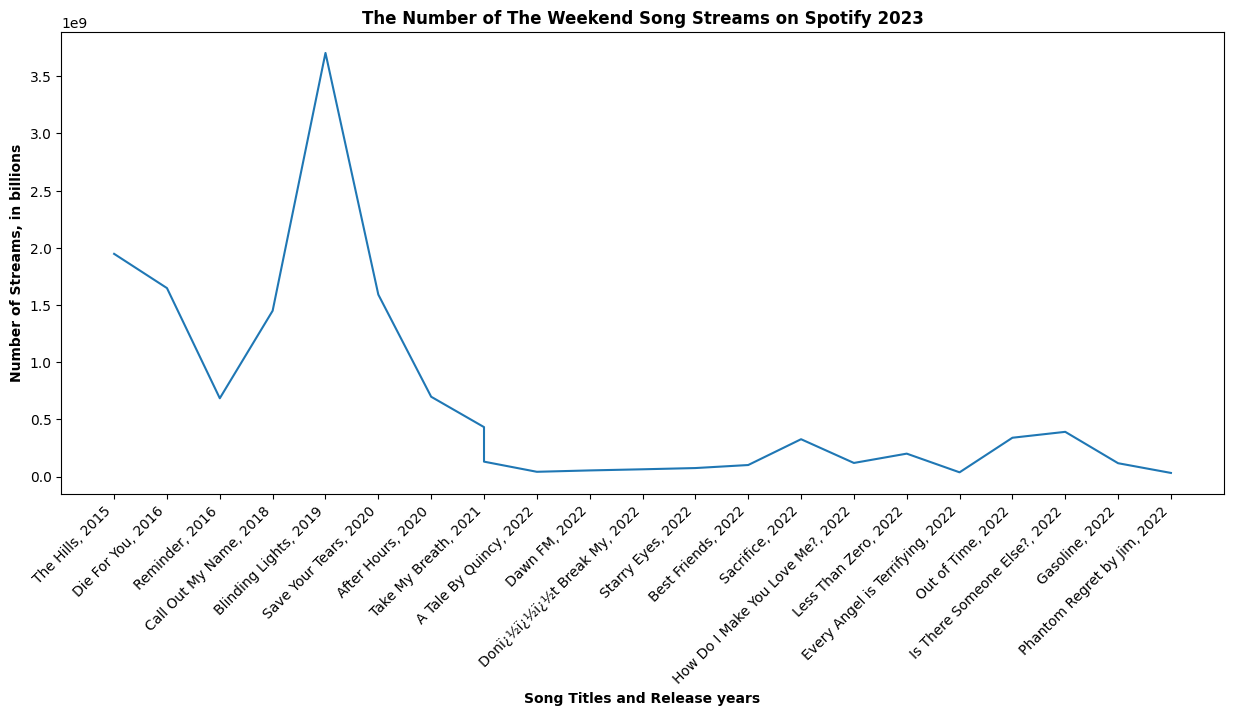

In [4]:
#3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, 
#   який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

# в датасеті немає підходящих даних для цього..., тому трохи перероблюю умову
# Лінійний графік прослуховувань пісень одного артиста:

artist = df[df["artist(s)_name"] == "The Weeknd"]
artist = artist.sort_values(by = "released_year")
track_year = artist["track_name"] + ", " + artist["released_year"].astype(str)
streams = artist["streams"]

plt.figure(figsize = (15, 6))
plt.plot(track_year, streams)
plt.xlabel("Song Titles and Release years", fontweight="bold")
plt.ylabel("Number of Streams, in billions", fontweight="bold")
plt.title("The Number of The Weekend Song Streams on Spotify 2023", fontweight="bold")
plt.xticks(rotation = 45, horizontalalignment="right")

plt.show()

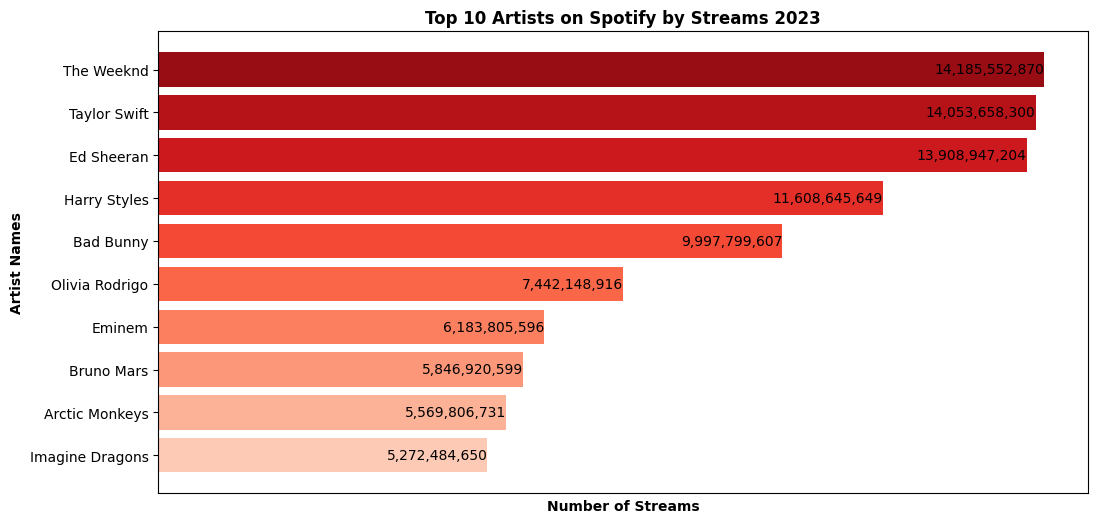

In [5]:
#4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, 
#   на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

artist_streams = df.groupby("artist(s)_name")["streams"].sum().reset_index()
artist_streams = artist_streams.sort_values(by="streams", ascending = False)
artist_streams = artist_streams.head(10)[::-1]

colors = plt.get_cmap("Reds")(np.linspace(0.2, 0.9, len(artist_streams)))
plt.figure(figsize=(12, 6))
bars = plt.barh(artist_streams["artist(s)_name"], artist_streams["streams"], color = colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"{round(width):,}", ha="right", va="center")
plt.title("Top 10 Artists on Spotify by Streams 2023", fontweight="bold")
plt.xlabel("Number of Streams", fontweight="bold")
plt.ylabel("Artist Names", fontweight="bold")
plt.xticks([])
plt.show()

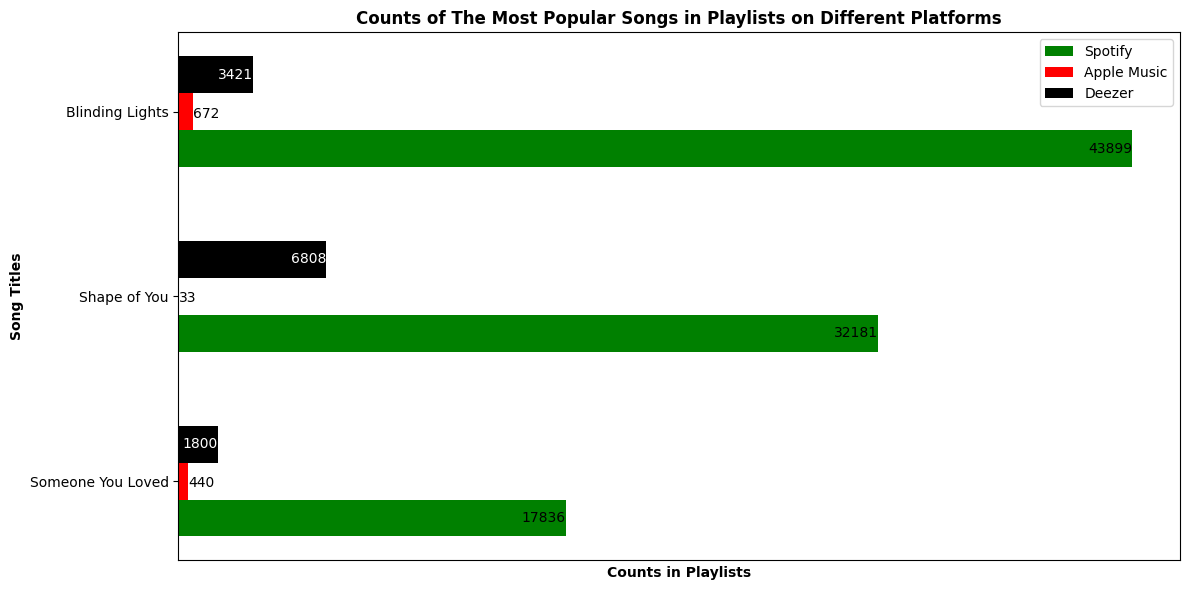

In [6]:
#5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, 
#   яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

# це буде дуже схоже до 1 завдання, тому також трохи перероблюю умову
# Порівняння 3 найпопулярніших треків за кількістю плейлистів з ними на різних платформах:

top_3 = df.head(3)[::-1]

tracks = top_3["track_name"].tolist()
spotify_counts = top_3["in_spotify_playlists"].tolist()
apple_counts = top_3["in_apple_playlists"].tolist()
deezer_counts = top_3["in_deezer_playlists"].tolist()
deezer_counts = [int(x.replace(",", "")) for x in deezer_counts]

index = np.arange(len(tracks))

bar_height = 0.2
plt.figure(figsize=(12, 6))
plt.barh(index - bar_height, spotify_counts, bar_height, label="Spotify", color="green", align="center")
plt.barh(index, apple_counts, bar_height, label="Apple Music", color='red', align="center")
plt.barh(index + bar_height, deezer_counts, bar_height, label="Deezer", color="black", align="center")

for i in range(len(tracks)):
    plt.text(spotify_counts[i], index[i] - 2 * bar_height / 2, spotify_counts[i], ha = "right", va = "center")
    plt.text(apple_counts[i], index[i] - 0.1 * bar_height / 2, apple_counts[i], ha = "left", va = "center")
    plt.text(deezer_counts[i], index[i] + 2 * bar_height / 2, deezer_counts[i], color = "white", ha = "right", va = "center")

plt.xlabel("Counts in Playlists", fontweight="bold")
plt.ylabel("Song Titles", fontweight="bold")
plt.title("Counts of The Most Popular Songs in Playlists on Different Platforms",fontweight="bold")
plt.yticks(index, tracks)
plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()